# Hierarchical Clustering analysis of Counties with High Prevalence of Diabetes and High prevalence of obesity

In [3]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/combined.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [8]:
#read in variable information and build variable information dictionary with variable names as key
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/Var_name_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1", index_col='variable')

In [ ]:
df.info()

In [ ]:
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [9]:
#remove categorical variables
df=df[df.columns.difference(['State', 'County', 'RUCC_2013'])]

In [10]:
#finds columns with more than 30 missing values
number_null_values_percol=df.isnull().sum(axis=0)
cols_with_over_30_null_values=number_null_values_percol[number_null_values_percol>30]
print (cols_with_over_30_null_values.index)

Index(['var1', 'var28', 'var29', 'var41', 'var43', 'var54', 'var57'], dtype='object')


In [11]:
#drop these columns first
df=df.drop(list(cols_with_over_30_null_values.index), axis=1)
df=df.dropna()

In [12]:
df.shape

(3114, 52)

Single out the counties with top 20% diabetes prevalence and top 20% obesity prevalence

In [13]:
df['db_level']=pd.qcut(df['prevalence of diabetes'],6, labels=range(6))
df['ob_level']=pd.qcut(df['prevalence of obesity'],6, labels=range(6))

In [15]:
#preprocess the subset of data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_subset=df[(df['db_level']==5) & (df['ob_level']==5)].drop(['db_level','ob_level'],axis=1)
X_minmax = min_max_scaler.fit_transform(df_subset.values)
normed_df=pd.DataFrame(X_minmax, index=df_subset.index, columns=df_subset.columns)

Principal Component Analysis

In [16]:
#PCA using Sklearn 
from sklearn.decomposition import PCA

explained_var=list()
for d in range(1,len(normed_df.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df)
    explained_var.append(sum(pca.explained_variance_ratio_))

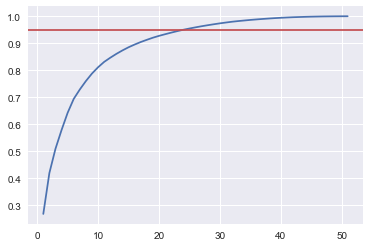

In [17]:
plt.plot(range(1,len(normed_df.columns)), explained_var)
plt.axhline(y=0.95, color='r')
plt.show()

In [30]:
#95% of variance can be explained by 22 components out of total 52 variables
pca = PCA(n_components=15)
pca.fit(normed_df)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
data_transformed=pca.transform(normed_df)
df_transformed=pd.DataFrame(data_transformed, index=normed_df.index)
X=df_transformed

In [20]:
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list, set_link_color_palette,linkage

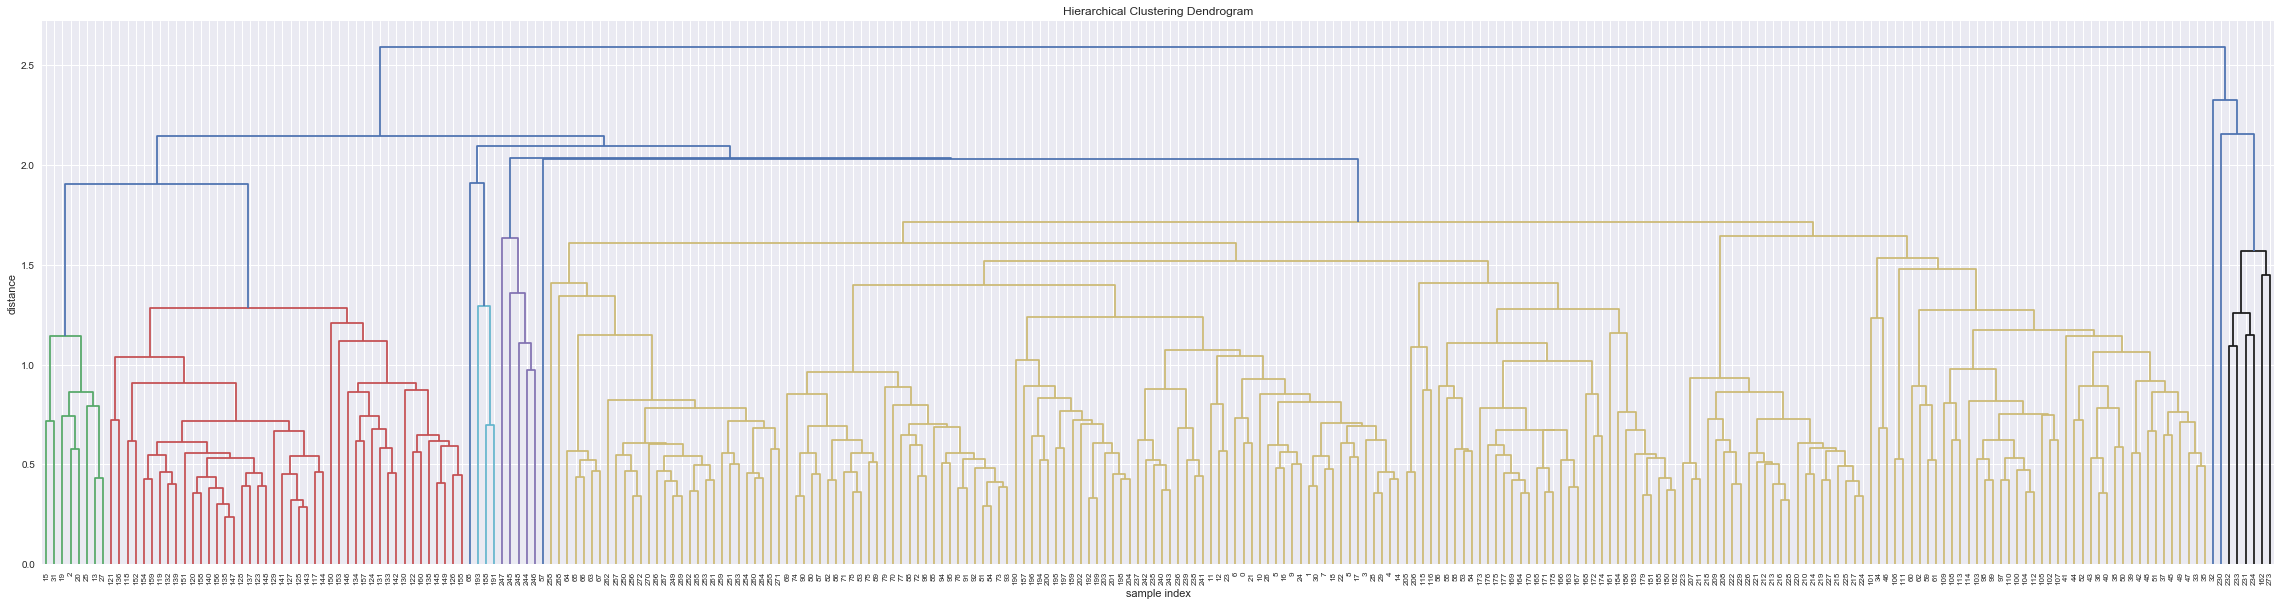

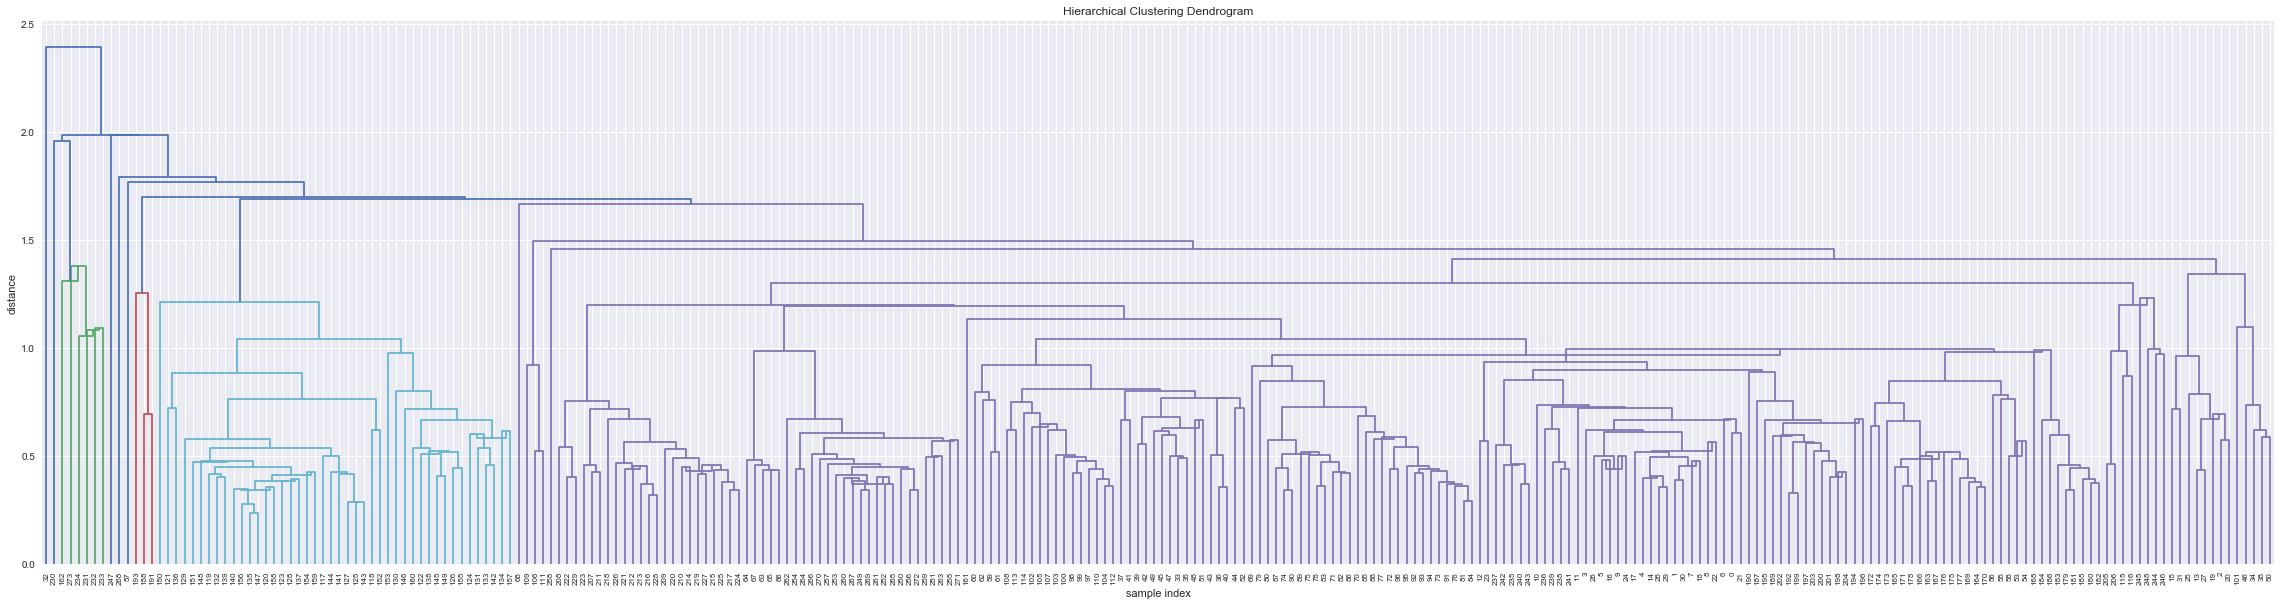

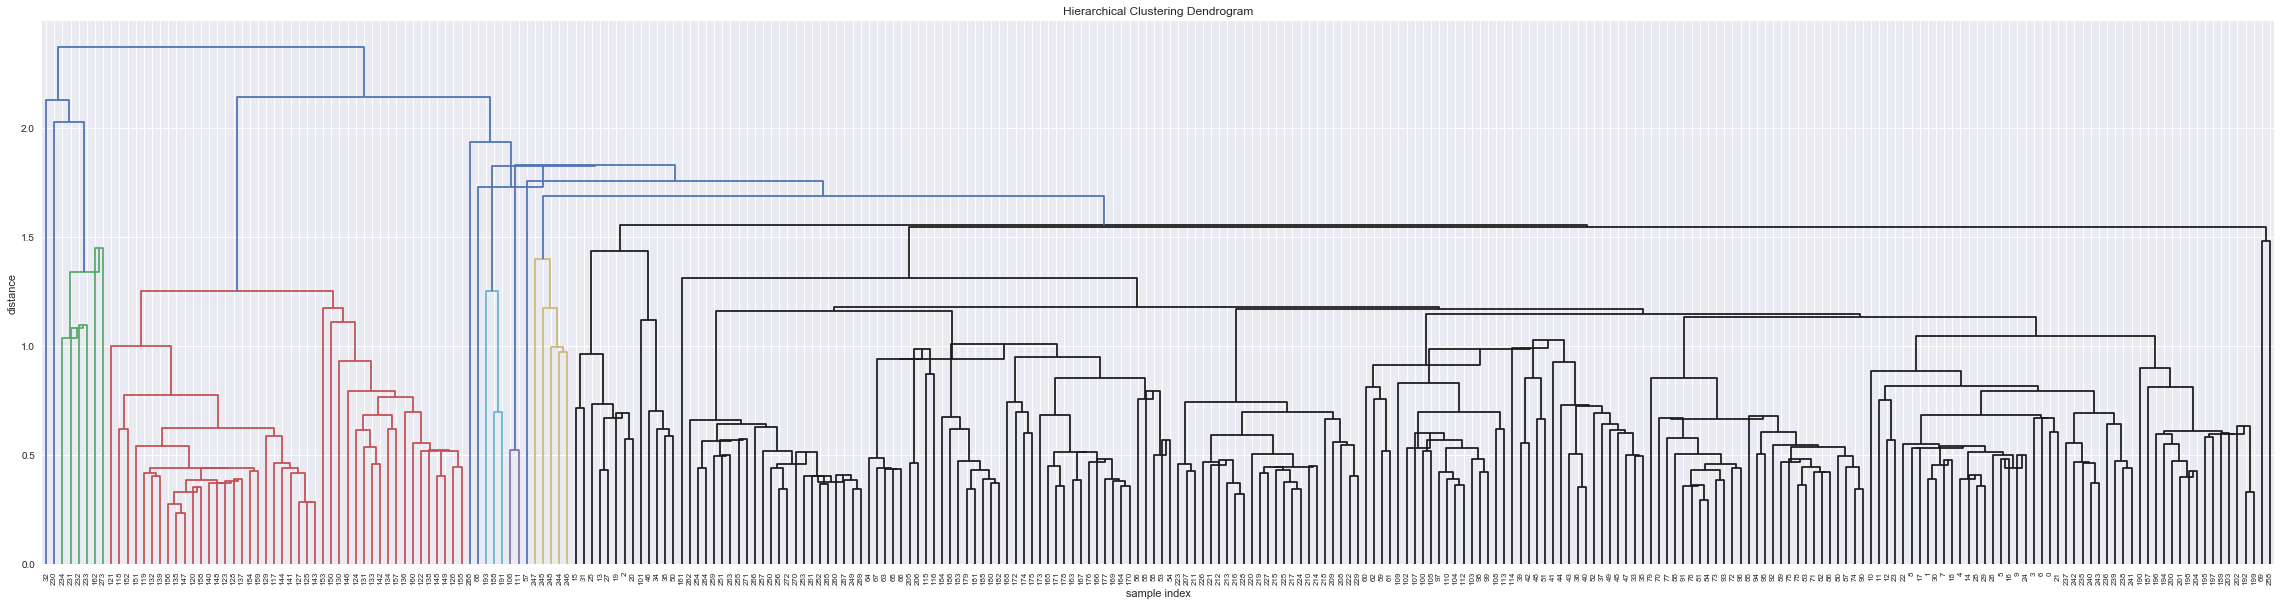

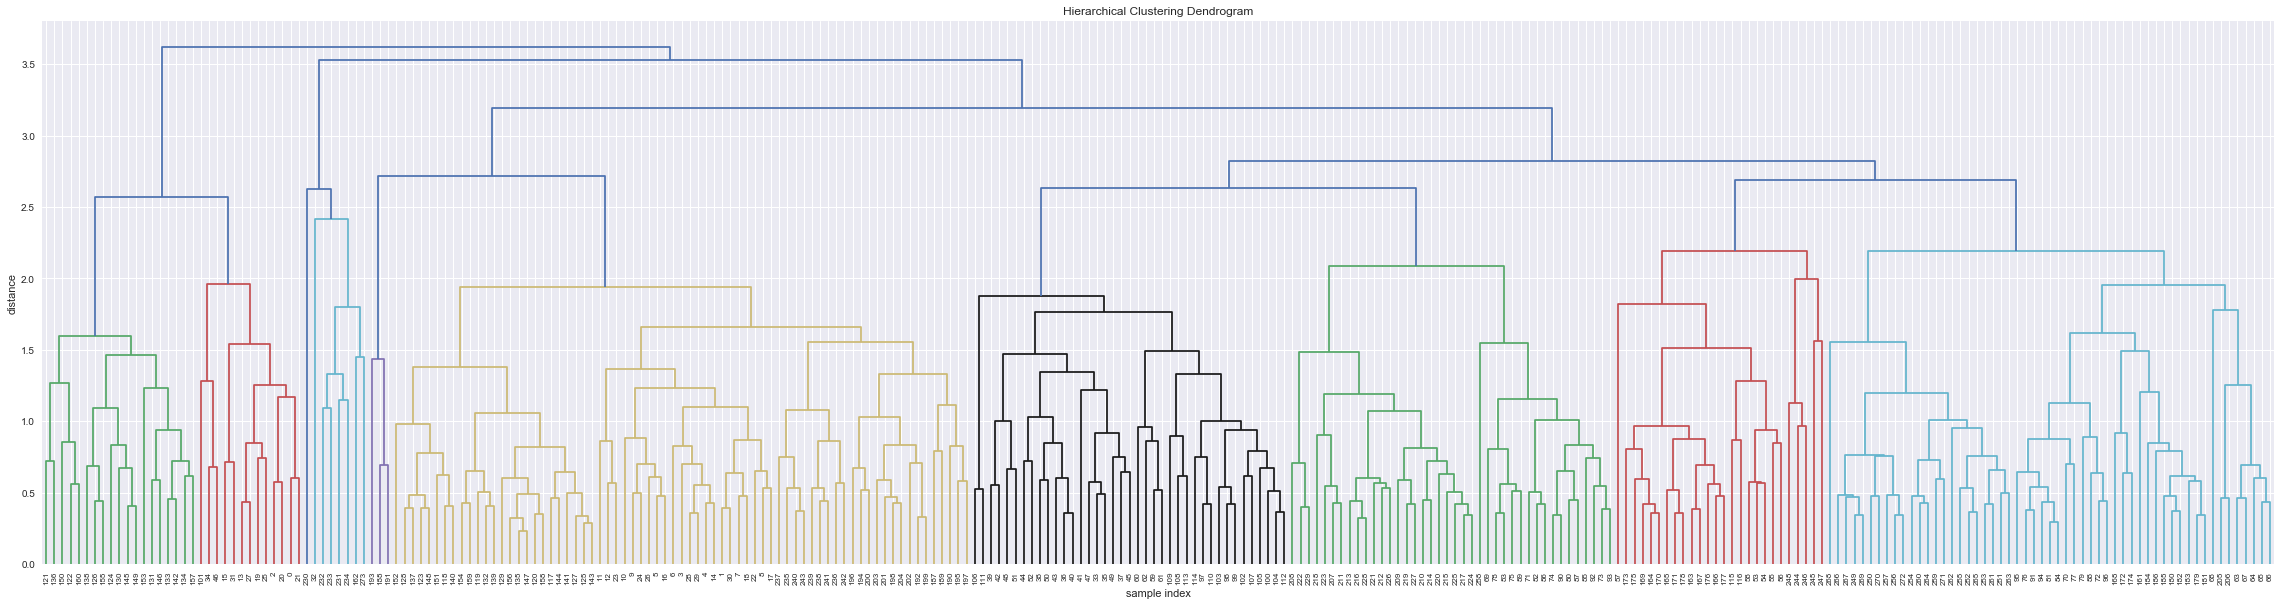

In [23]:
#test different ways of linkage computation and choose one that gives most tight and reasonable clusters
distance_way= ['ward', 'single', 'average', 'weighted', 'centroid', 'median']

for method in ['average',  'centroid', 'median', 'complete']:
    plt.figure(figsize=(40,10))
    Z = linkage(X, method)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.title(method)
    plt.show()

In [33]:
#choose complete method
Z = linkage(X, 'complete')

In [34]:
from collections import Counter

#cut the dendrogram where reasonable clusters are identified
labels = fcluster(Z,3.2,'distance')
print (Counter(labels))

Counter({3: 234, 1: 32, 2: 8})


In [64]:
group_colors=['gold','red','purple']

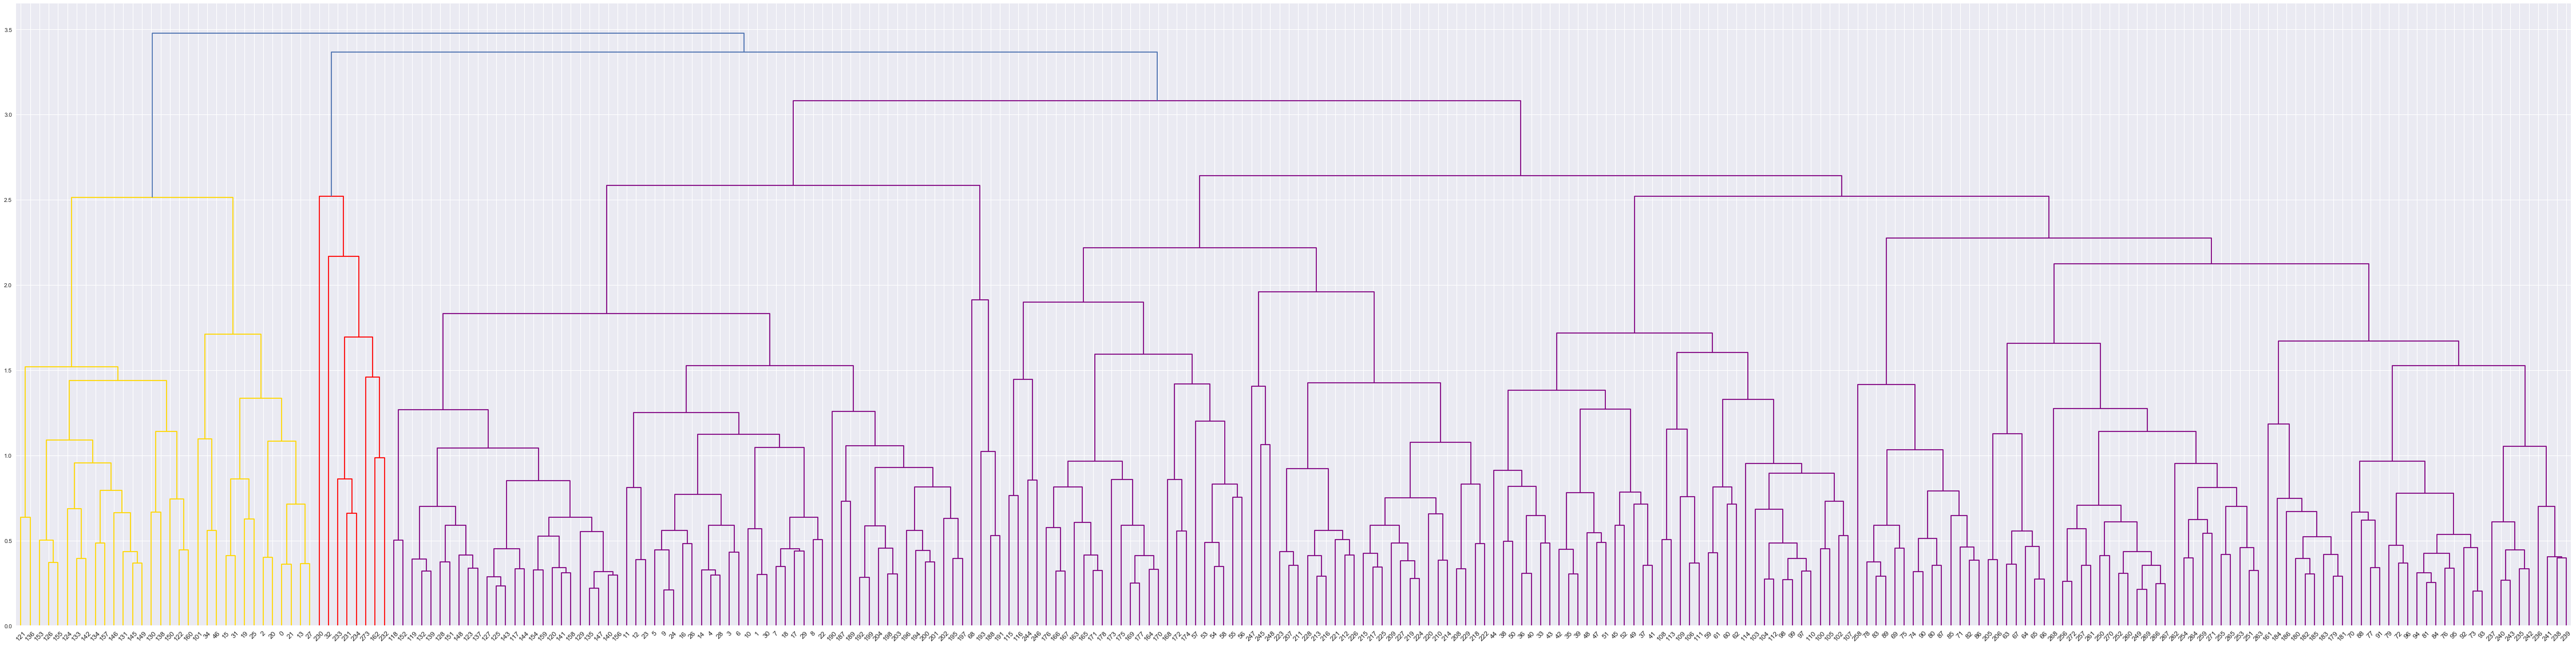

In [65]:
set_link_color_palette(group_colors)
plt.figure(figsize=(80,20))
D = dendrogram(Z=Z, color_threshold=3.2, leaf_font_size=12, leaf_rotation=45)
plt.show()

In [41]:
df_subset['group']=labels

In [28]:
#write function to draw stacked percentage plot with standard deviation: bar_race for race variables and bar_age for age variables

import numpy as np
import matplotlib.pyplot as plt

def Bar_race(groups_to_plot, df):
    N=len(groups_to_plot)
    whitemeans=np.empty(N)
    whitestd=np.empty(N)
    blackmeans=np.empty(N)
    blackstd=np.empty(N)
    asianmeans=np.empty(N)
    asianstd=np.empty(N)
    hispmeans=np.empty(N)
    hispstd=np.empty(N)
    Ame_Ind_Alkmeans=np.empty(N)
    Ame_Ind_Alkstd=np.empty(N)
    Hawa_Islandmeans=np.empty(N)
    Hawa_Islandstd=np.empty(N)

    groups=groups_to_plot

    for n, group in enumerate(groups):
        df_group=df[df['group']==group]
        whitemeans[n]=np.mean(df_group['var59'])
        whitestd[n]=np.std(df_group['var59'])

        blackmeans[n]=np.mean(df_group['var60'])
        blackstd[n]=np.std(df_group['var60'])

        asianmeans[n]=np.mean(df_group['var62'])
        asianstd[n]=np.std(df_group['var62'])

        hispmeans[n]=np.mean(df_group['var61'])
        hispstd[n]=np.std(df_group['var61'])

        Ame_Ind_Alkmeans[n]=np.mean(df_group['var63'])
        Ame_Ind_Alkstd[n]=np.std(df_group['var63'])

        Hawa_Islandmeans[n]=np.mean(df_group['var64'])
        Hawa_Islandstd[n]=np.std(df_group['var64'])

    width = 0.35       # the width of the bars: can also be len(x) sequence

    ind = np.arange(N)

    p1=plt.bar(ind, whitemeans, width, color='r', yerr=whitestd)
    p2=plt.bar(ind, blackmeans, width, color='m', bottom=whitemeans, yerr=blackstd)
    p3=plt.bar(ind, hispmeans, width, color='g', bottom=sum([whitemeans,blackmeans]), yerr=hispstd)
    p4=plt.bar(ind, asianmeans, width, color='y', bottom=sum([whitemeans, blackmeans, hispmeans]), yerr=asianstd)
    p5=plt.bar(ind, Ame_Ind_Alkmeans, width, color='b', bottom=sum([whitemeans, blackmeans, hispmeans, asianmeans]), yerr=Ame_Ind_Alkstd)
    p6=plt.bar(ind, Hawa_Islandmeans, width, color='purple', 
            bottom=np.sum([whitemeans,blackmeans,hispmeans,asianmeans,Ame_Ind_Alkmeans]), yerr=Hawa_Islandstd)

    plt.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0]), ('White', 'Black', 
                                                          'Hispanic', 'Asian','American Indian or Alaska Native', 
                                                          'Hawaiian or Pacific Islander'), bbox_to_anchor=(1.04,1))
    plt.xticks(range(N), ['cluster_'+str(g) for g in groups_to_plot], rotation=45)
    plt.ylim(0, 110)
    plt.show()

In [27]:
def Bar_age(groups_to_plot, df):
    N=len(groups_to_plot)

    under_18_means=np.empty(N)
    under_18_std=np.empty(N)
    fr18to65_means=np.empty(N)
    fr18to65_std=np.empty(N)
    above_65_means=np.empty(N)
    above_65_std=np.empty(N)


    groups=groups_to_plot
    for n, group in enumerate(groups):
        df_group=df_subset[df_subset['group']==group]
        df_group['adult']=100-df_group['var65']-df_group['var66']

        under_18_means[n]=np.mean(df_group['var66'])
        under_18_std[n]=np.std(df_group['var66'])

        fr18to65_means[n]=np.mean(df_group['adult'])
        fr18to65_std[n]=np.std(df_group['adult'])

        above_65_means[n]=np.mean(df_group['var65'])
        above_65_std[n]=np.std(df_group['var65'])

    width = 0.35       # the width of the bars: can also be len(x) sequence

    ind = np.arange(N)

    p1=plt.bar(ind, under_18_means, width, color='y', yerr=under_18_std)
    #p2=plt.bar(ind, fr18to65_means, width, color='r', bottom=under_18_means, yerr=fr18to65_std)
    p2=plt.bar(ind, above_65_means, width, color='m', bottom=sum([under_18_means]), yerr=above_65_std)


    plt.legend((p1[0], p2[0]), ('<18 years', '>=65 years'), bbox_to_anchor=(1.04,1))
    plt.xticks(range(N), ['group'+str(i) for i in range(1,N+1)], rotation=45)
    plt.ylim(0, 50)
    plt.show()

In [66]:
#write function to draw bar chart of features by clusters
def Bar_features(groups, df, features, group_colors,  nrow, ncol, size):
    N=len(groups)
    print (N)
    
    for i,var in enumerate(features):
        plt.subplot(nrow, ncol, i+1)
        means=np.empty(N)
        stds=np.empty(N)
        max_values=list()
        for n, group in enumerate(groups):
            df_group=df[df['group']==group]

            means[n]=np.mean(df_group[var])
            stds[n]=np.std(df_group[var])
            max_values.append(np.mean(df_group[var])+np.std(df_group[var]))

        width = 1       # the width of the bars: can also be len(x) sequence

        ind = np.arange(N)

        plt.bar(ind, means, width, yerr=stds, color=group_colors)

        if var in var_info_df.index:
            plt.ylabel(var_info_df.loc[var]['meaning'], size=size)            
        else: 
            plt.ylabel(var, size=size)

        plt.xticks(range(N), ['cluster_'+str(g) for g in groups], rotation=45, size=size)
        plt.yticks(size=size)

        plt.ylim(0, max(max_values))
    plt.show()

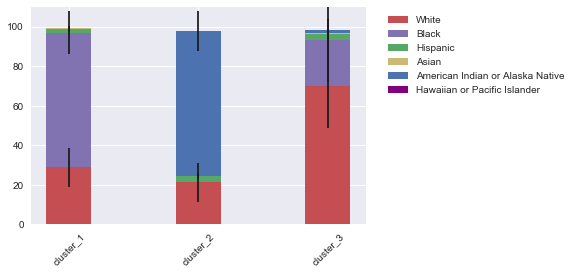

In [36]:
Bar_race([1,2,3], df_subset)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


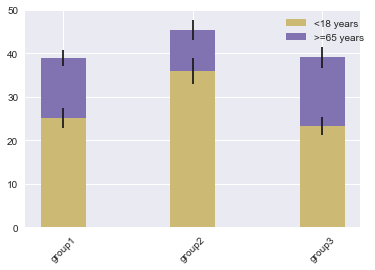

In [37]:
Bar_age([1,2,3], df_subset)

3


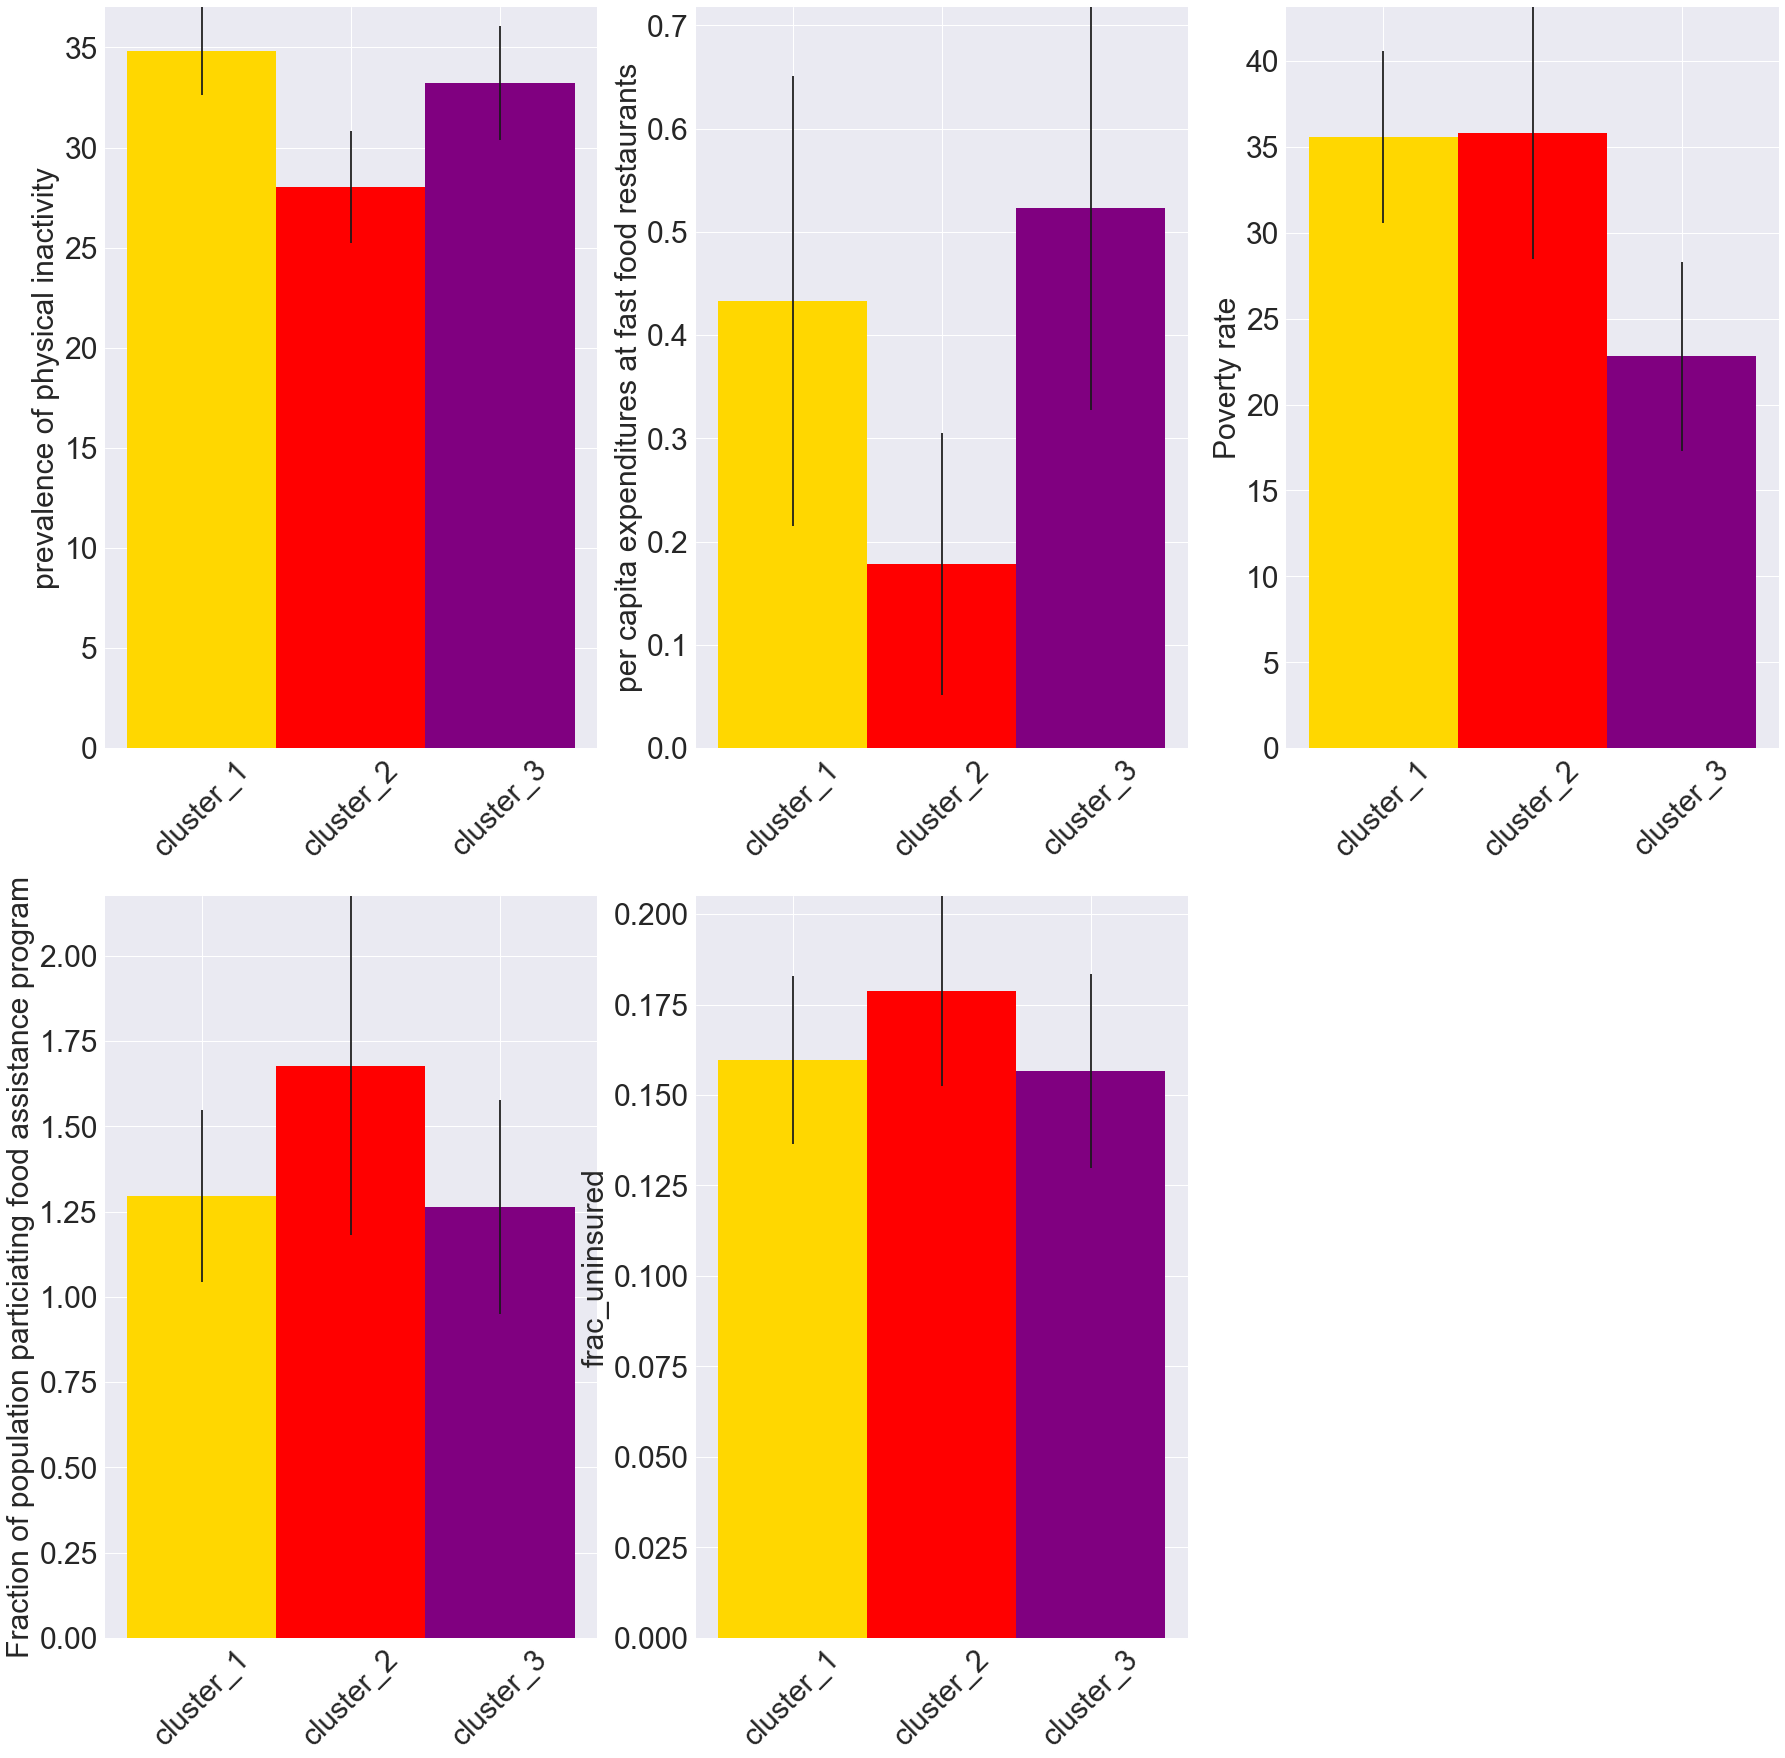

In [73]:
plt.figure(facecolor="w", figsize=(30,30))
features=['prevalence of physical inactivity']
features.extend(['var'+str(n) for n in [20,68,33]])
features.append('frac_uninsured')

Bar_features([1,2,3], df_subset, features, group_colors, 2,3, 30)

Construct the dataframe to record the clusters that each county belongs to

In [47]:
df_with_groups=df[[]]

In [48]:
df_with_groups['group']=df_subset['group']

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_with_groups.shape

(3114, 1)

In [50]:
df_with_groups

,group
FIPS,
1001,NaN
1003,NaN
1005,1.0
1007,3.0
1009,NaN
1011,1.0
1013,3.0
1015,NaN
1017,3.0


In [56]:
#assign the counties that are not among the most diabetic and obese counties to cluster 0
df_with_groups=df_with_groups.fillna(0)

In [59]:
df_with_groups['clusters']=df_with_groups['group'].apply((lambda x:'cluster_'+str(int(x))))

In [60]:
df_with_groups[['clusters']].to_csv('C:/Users/cathy/Capstone_project_1/Datasets/cluster_groups_diabetic_obese.csv')